In [1]:
import umap.parametric_umap

/cr/work/kastner/miniconda3/envs/aera01/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-08-16 18:27:38.446206: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-16 18:27:38.464577: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755361658.483692  191194 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755361658.489559  191194 cuda_blas

In [2]:
import sys
sys.path.insert(0, '../../')
import numpy as np
import pandas
from helper_scripts import random_rm_trace_generator
import importlib
from matplotlib import pyplot as plt
from modules import parametric_umap_classifier
from modules import performance_metrics as pm

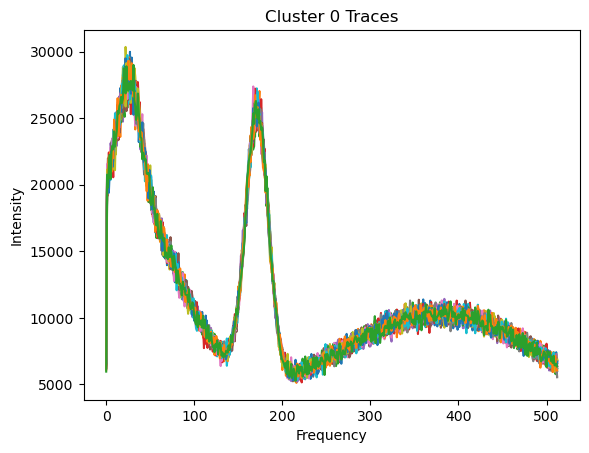

In [3]:
cluster_idx = 0
time_traces, spectra, phase, true_clusters, _,_=random_rm_trace_generator.generate_random_rm_traces(100, n_clusters=4, outlier_fraction=0.05)
for i in range(100):
    if true_clusters[i] == cluster_idx:
        plt.plot(spectra[i], label=f'Trace {i+1}')
        plt.xlabel('Frequency')
        plt.ylabel('Intensity')
plt.title(f'Cluster {cluster_idx} Traces')
plt.show()

In [4]:
importlib.reload(parametric_umap_classifier)
importlib.reload(random_rm_trace_generator)

<module 'helper_scripts.random_rm_trace_generator' from '/cr/work/kastner/private/umap/rm_classifier/tutorials/notebooks/helper_scripts/random_rm_trace_generator.py'>

In [5]:
pu_clas = parametric_umap_classifier.ParametricUMAPClassifier(yaml_path="../yaml_files/umap_classifier_test.yaml", data_preparation={'target_data_type': "time"})

In [6]:
prepared_data=pu_clas.prepare_data(time_traces, input_data_type="time",  data_preparation={'target_data_type': "fft"}, 
                 log_filter=False,avg_pooling=4,verbose=False,
                 normalization=False,
                 suppress_dc=True)

In [7]:
embeddings=pu_clas.embed(prepared_data, save_model="umap_model.pkl")

Embedding data with parameters: n_neighbors=40, min_dist=0.0, n_components=2, metric=braycurtis
TrackedPUMAP(n_training_epochs=100)
Sat Aug 16 18:27:44 2025 Construct fuzzy simplicial set
Sat Aug 16 18:27:45 2025 Finding Nearest Neighbors


2025-08-16 18:27:44.873432: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/cr/work/kastner/miniconda3/envs/aera01/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Sat Aug 16 18:27:50 2025 Finished Nearest Neighbor Search
Sat Aug 16 18:27:52 2025 Construct embedding
Epoch 1/100


/cr/work/kastner/miniconda3/envs/aera01/lib/python3.11/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.7916
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7407
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6542
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6544
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5867
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5713
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5077
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4834
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4466
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4088
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3640
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3965
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4696
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4180
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3933
Epoch 16/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/s

/cr/work/kastner/miniconda3/envs/aera01/lib/python3.11/site-packages/umap/parametric_umap.py:946: UserWarning: Did not pickle parametric_model: Could not locate class 'TrackedUMAPModel'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'src.pumap', 'class_name': 'TrackedUMAPModel', 'config': {'name': 'umap_model', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}}, 'registered_name': 'TrackedUMAPModel', 'build_config': {'input_shape': [[100, 128], [100, 128]]}, 'compile_config': {'optimizer': {'module': 'keras.optimizers', 'class_name': 'Adam', 'config': {'name': 'adam', 'learning_rate': 0.0010000000474974513, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': 4.0, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_

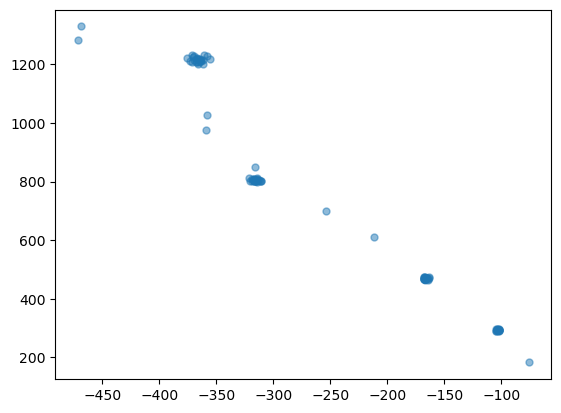

In [10]:
plt.plot(embeddings[:, 0], embeddings[:, 1], 'o', markersize=5, alpha=0.5)

In [17]:
clusters=pu_clas.classify(embeddings, db_min_samples=10, db_eps=50)
pu_clas.cluster_indices

Overriding db_min_samples with value 10 from kwargs.
Overriding db_eps with value 50 from kwargs.


array([0, 1, 2, 3])

In [18]:
pu_clas.save_cluster_trace(prepared_data, clusters, trace_statistic="mean")

Saved 4 cluster traces with mean statistic.


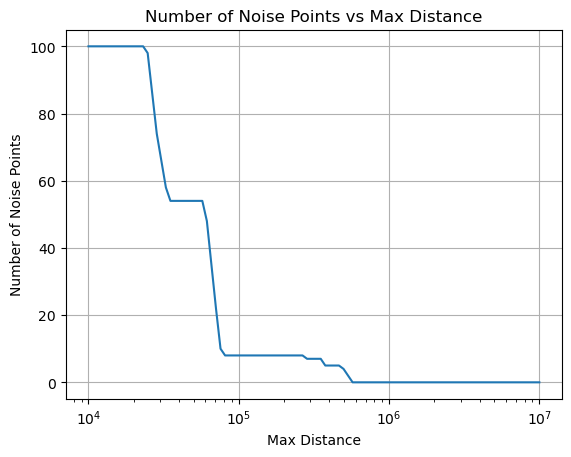

In [19]:
n_noise=[]
for max_distance in np.logspace(3,7,100):
    predictions, min_distances=pu_clas.minimum_distance_prediction(prepared_data, max_distance=max_distance)
    n_noise.append(np.sum(predictions == -1))

plt.plot(np.logspace(4,7,100), n_noise)
plt.xscale('log')
plt.xlabel('Max Distance')
plt.ylabel('Number of Noise Points')
plt.title('Number of Noise Points vs Max Distance')
plt.grid(True)
plt.show()

In [20]:
pu_clas.save_cluster_trace(prepared_data,clusters,trace_statistic="mean")
pu_clas.save_cluster_trace(prepared_data,clusters,trace_statistic="std")
predictions, mls = pu_clas.ml_uncorrelated_normal_prediction(prepared_data)

Saved 4 cluster traces with mean statistic.
Saved 4 cluster traces with std statistic.


In [22]:
predictions, mls = pu_clas.ml_uncorrelated_normal_prediction(prepared_data, min_logl=-2000)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

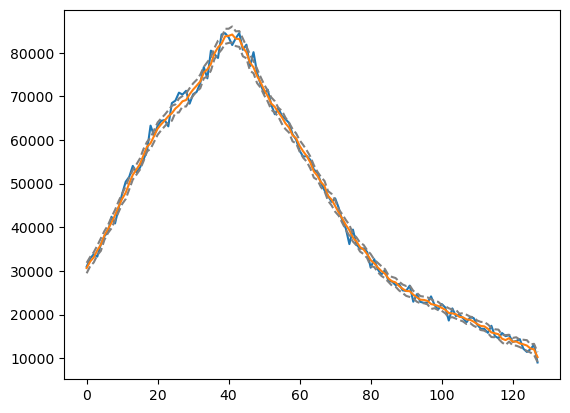

In [23]:
idx=59
cluster_idx=clusters[idx]
plt.plot(prepared_data[idx])
plt.plot(pu_clas.cluster_mean_traces[cluster_idx])
plt.plot(pu_clas.cluster_mean_traces[cluster_idx] + pu_clas.cluster_std_traces[cluster_idx], linestyle='--', color='gray')
plt.plot(pu_clas.cluster_mean_traces[cluster_idx] - pu_clas.cluster_std_traces[cluster_idx], linestyle='--', color='gray')

In [24]:
pu_clas.save_cluster_cholesky_factors(prepared_data,clusters)
predictions, mls = pu_clas.ml_correlated_normal_prediction(prepared_data)

Saved 4 cluster Cholesky factors.


In [31]:
predictions, embeddings = pu_clas.umap_transform_prediction(prepared_data, db_eps=500)

Transforming data with UMAP model and predicting clusters with DBSCAN (eps=500)
Processing batch 0 to 20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Creating DBSCAN model


In [32]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 2, 3, 1, 3, 2, 2])

In [34]:
pu_clas.save_cluster_trace(prepared_data, clusters, trace_statistic="quantile", q=0.1)
pu_clas.save_cluster_trace(prepared_data, clusters, trace_statistic="quantile", q=0.9)
pu_clas.save_cluster_trace(prepared_data, clusters, trace_statistic="median")

Saved 4 cluster traces with quantile statistic.
Saved 4 cluster traces with quantile statistic.
Saved 4 cluster traces with median statistic.


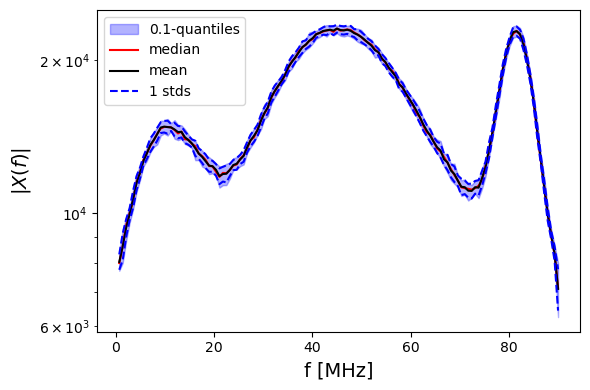

In [35]:
fig, ax = pu_clas.plot_spectra(1, q=0.1, sigma=1)

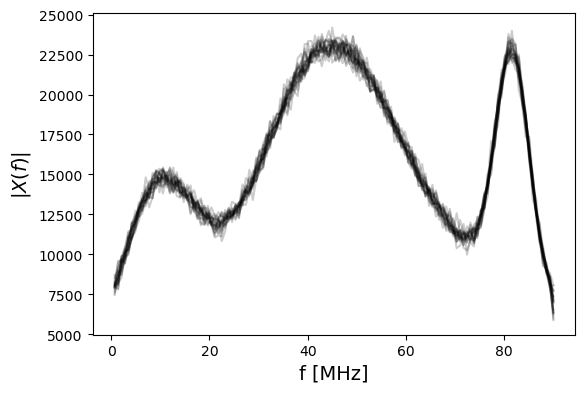

In [36]:
fig, ax=pu_clas.plot_cluster_samples(prepared_data, clusters, cluster_idx=1, n_samples=20, alpha=0.2)
ax[0].set_yscale('linear')
plt.show()

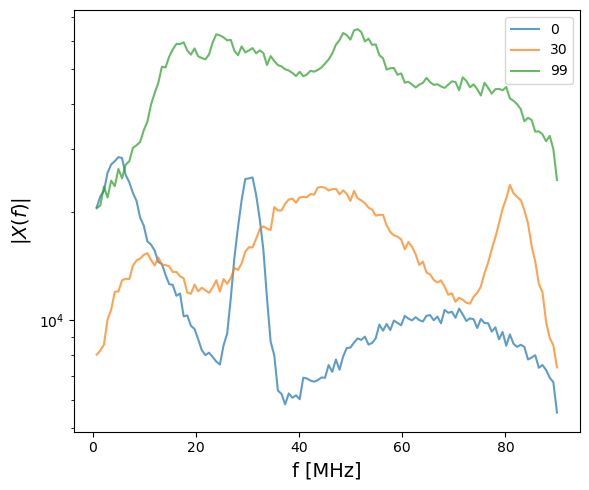

In [37]:
fig, ax = pu_clas.plot_index(prepared_data, index = [0,30,99])

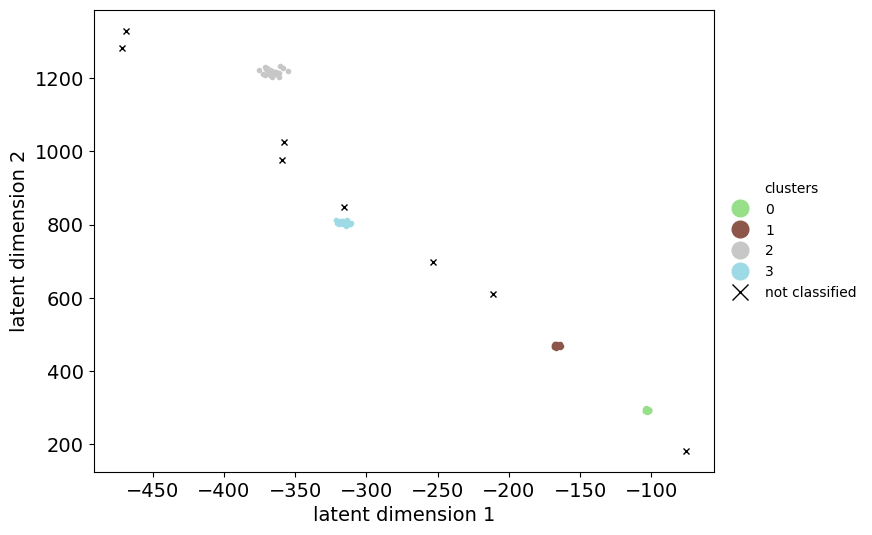

In [38]:
fig, ax = pu_clas.plot_embedding(embeddings, labels=true_clusters, label_type='classes', alpha=1)

In [39]:
pu_clas.plot_overview_bokeh(embeddings, index=list(range(len(embeddings))), cluster=clusters, color_key='cluster', true_cluster=true_clusters,)

Loading BokehJS ...

In [40]:
comp, confusion_matrix=pm.confusion_matrix_from_dominant_cluster_label(true_clusters, clusters)


In [41]:
ps_summary, ps= pm.prediction_performance(confusion_matrix, comp=comp, normal_label=0, verbose=True)
ps_summary

{'ri_score': 0.9899999999999514,
 'ari_score': 0.9895307520937987,
 'nmi': 0.9768442536623755,
 'ami': 0.9754274449253377,
 'n_clusters': 5,
 'cluster_nmi': 0.9768442536623755,
 'cluster_ami': 0.9754274449253377,
 'cluster_n_clusters': 5,
 'cluster_n_noise': 8,
 'cluster_expected_separability': 0.9857142857142858,
 'cluster_mean_separability': 0.9861111111111112,
 'cluster_expected_accuracy': 0.9857142857142858,
 'cluster_mean_accuracy': 0.9861111111111112,
 'cluster_expected_malfunction_classified_as_normal': 0.0,
 'cluster_mean_malfunction_classified_as_normal': 0.0,
 'cluster_expected_purity': 1.0,
 'cluster_mean_purity': 1.0,
 'cluster_false_alerts': 0.0,
 'n_noise': 7,
 'mean_efficiency': 0.9999999999999566,
 'mean_purity': 0.986111111111069,
 'mean_true_malfunction_pred_noise': 0.0,
 'mean_true_noise_pred_malfunction': 0.0,
 'mean_fake_rate': 0.0,
 'mean_escape_rate': 0.0,
 'mean_f1_score': 0.992907801417897,
 'expected_efficiency': 0.9999999999999566,
 'expected_purity': 0.98571